Chapter 1. The Machine Learning Landscape- bootcamp

loading the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor


Loading the data set

In [ ]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [ ]:
print("Dataset:")
print(lifesat)

Dataset:
           Country  GDP per capita (USD)  Life satisfaction
0           Russia          26456.387938                5.8
1           Greece          27287.083401                5.4
2           Turkey          28384.987785                5.5
3           Latvia          29932.493910                5.9
4          Hungary          31007.768407                5.6
5         Portugal          32181.154537                5.4
6           Poland          32238.157259                6.1
7          Estonia          35638.421351                5.7
8            Spain          36215.447591                6.3
9         Slovenia          36547.738956                5.9
10       Lithuania          36732.034744                5.9
11          Israel          38341.307570                7.2
12           Italy          38992.148381                6.0
13  United Kingdom          41627.129269                6.8
14          France          42025.617373                6.5
15     New Zealand          424

consists of three columns: "Country", "GDP per capita (USD)", and "Life satisfaction", with 27 rows representing different countries. Each row corresponds to a specific country and contains data on its GDP per capita and life satisfaction score.


In [ ]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
print("Null values in the dataset:")
print(lifesat.isnull().sum())

Null values in the dataset:
Country                 0
GDP per capita (USD)    0
Life satisfaction       0
dtype: int64


no null values

In [ ]:
from scipy import stats
lifesat_numeric = lifesat.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(lifesat_numeric))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
print("Indices of outliers:")
print(outlier_indices)


Indices of outliers:
(array([], dtype=int64), array([], dtype=int64))


no outliers


In [ ]:
print("Descriptive Statistics:")
print(lifesat.describe())

Descriptive Statistics:
       GDP per capita (USD)  Life satisfaction
count             27.000000          27.000000
mean           41564.521771           6.566667
std             9631.452319           0.765607
min            26456.387938           5.400000
25%            33938.289305           5.900000
50%            41627.129269           6.800000
75%            49690.580269           7.300000
max            60235.728492           7.600000


On average, the GDP per capita is about **41,565 dollars**, with values ranging from approximately **26,456 dollars to 60,236 dollars**.


**The average life satisfaction score is around 6.57, with scores ranging from 5.4 to 7.6**.

Scatter plot showing the relationship between GDP per capita (USD) and Life satisfaction:


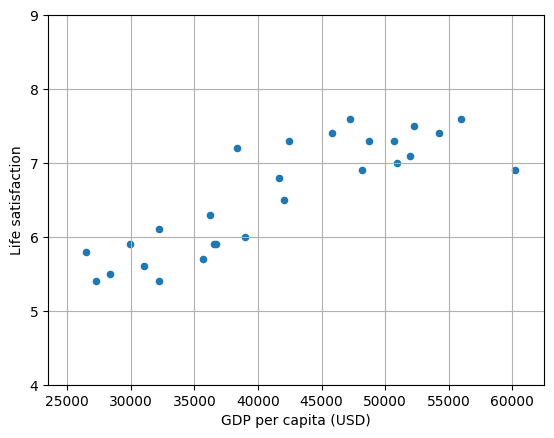

In [ ]:
print("Scatter plot showing the relationship between GDP per capita (USD) and Life satisfaction:")
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

**The scatter plot shows a positive correlation between GDP per capita and life satisfaction**.
 However, the  relationship is not perfectly linear, and there is some scatter around the trend line. This suggests that there are other factors besides GDP per capita that can influence life satisfaction.

linear regression model

In [ ]:

model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [ ]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


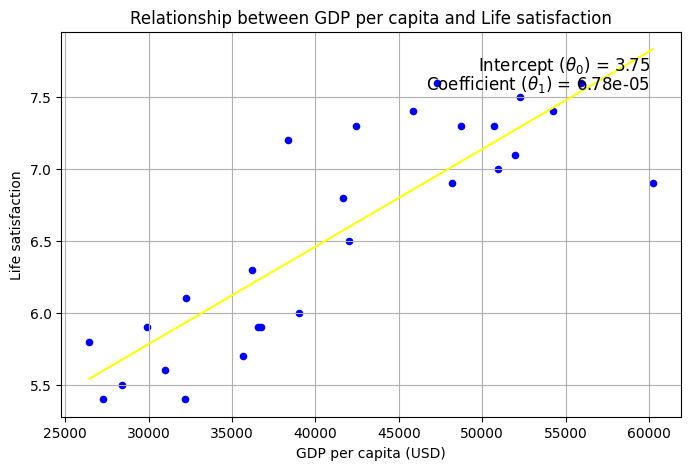

In [ ]:
import matplotlib.pyplot as plt


lifesat.plot(kind='scatter', figsize=(8, 5), grid=True, x="GDP per capita (USD)", y="Life satisfaction", color='blue')

X = np.linspace(lifesat["GDP per capita (USD)"].min(), lifesat["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, color="yellow")
plt.text(0.95, 0.9, f"Intercept ($\\theta_0$) = {t0:.2f}", transform=plt.gca().transAxes, fontsize=12, ha='right', color='black')
plt.text(0.95, 0.85, f"Coefficient ($\\theta_1$) = {t1:.2e}", transform=plt.gca().transAxes, fontsize=12, ha='right', color='black')


plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")

plt.show()

In [ ]:
X_new = [[3852]] #srilanka gdp as per 2020 instead of cyprus
print(model.predict(X_new))

[[4.01017264]]


The output [[4.01]] represents the predicted life satisfaction score for srilanka based on its GDP per capita in 2020.

In [ ]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)


model1 = KNeighborsRegressor(n_neighbors=3)
model1.fit(X, y)

# Making a prediction for srilanka instead of cyprus
print(model1.predict(X_new))

[[5.56666667]]



Based on the k-nearest neighbor model, the predicted life satisfaction score for Sri Lanka is **5.67**. This suggests that Sri Lanka's life satisfaction score is expected to be similar to the average life satisfaction score of its three nearest neighbors in terms of GDP per capita.

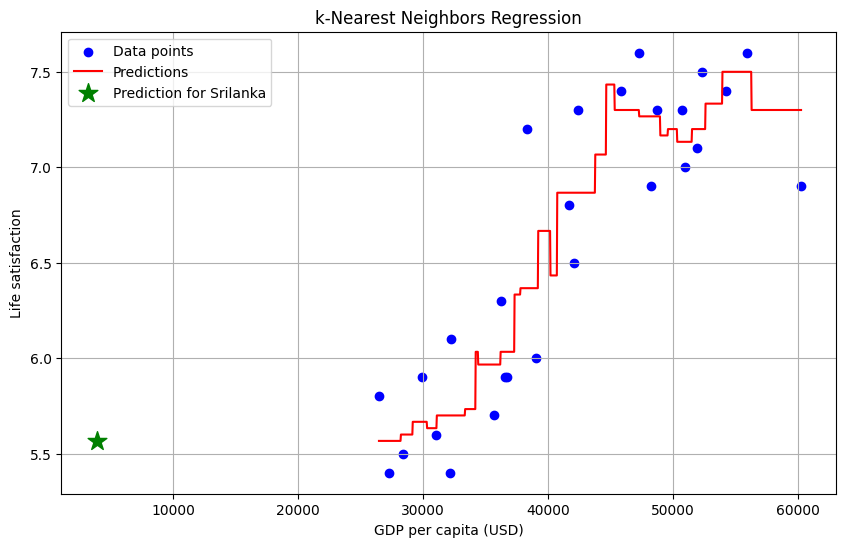

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_neighbors=3)

model1.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
predictions = model1.predict(X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, predictions, color='red', label='Predictions')
plt.scatter(X_new, model1.predict(X_new), color='green', label='Prediction for Srilanka', marker='*', s=200)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("k-Nearest Neighbors Regression")
plt.legend()
plt.grid(True)
plt.show()



 Identify the three closest countries by GDP per capita to Sri Lanka:
 - Turkey: GDP per capita = 28,384.99, Life satisfaction = 5.5
 - Greece: GDP per capita = 27,287.08, Life satisfaction = 5.4
 - Russia: GDP per capita = 26,456.39, Life satisfaction = 5.8

 Calculate the average life satisfaction for these three countries:
 Average Life Satisfaction = (5.5 + 5.4 + 5.8) / 3 = 5.57

 Confirm that the average life satisfaction matches the value obtained using the k-nearest neighbors regression model

plotting of the srilanka's GDP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Extract the features and target variable
gdp_per_capita = lifesat[['GDP per capita (USD)']].values
life_satisfaction = lifesat[['Life satisfaction']].values

# Train k-Nearest Neighbors regression model
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(gdp_per_capita, life_satisfaction)

# Predict life satisfaction for Sri Lanka
sri_lanka_gdp_per_capita = np.array([[3852]])
predicted_life_satisfaction = knn.predict(sri_lanka_gdp_per_capita)

# Access the first element correctly
predicted_life_satisfaction_value = predicted_life_satisfaction[0][0]
print(f"Predicted life satisfaction for Sri Lanka: {predicted_life_satisfaction_value:.2f}")



Predicted life satisfaction for Sri Lanka: 5.57



The results show that the predicted life satisfaction score for Sri Lanka is **5.57** based on the k-nearest neighbors regression model and
 **4.01** based on the linear regression model.
  

**The python code confirms the same value of 5.57  predicted manually **


**additionalvisualisation **


Based on Figure 1-9. Example of a t-SNE visualization highlighting semantic clusters⁠2
from chap 1

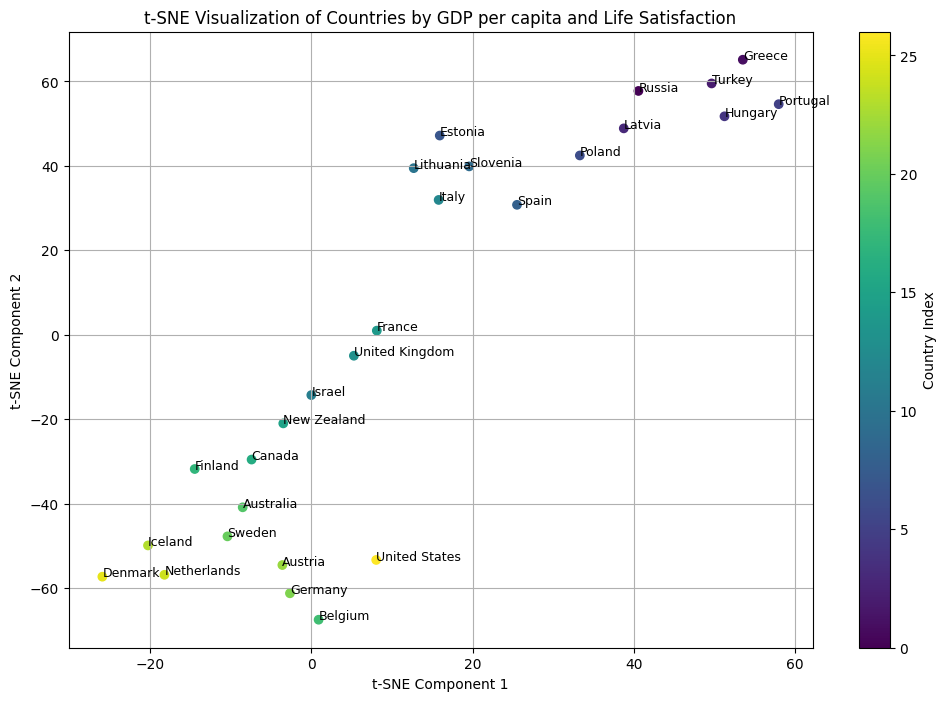

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values


X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)


combined_data = np.hstack((X_reshaped, y_reshaped))


scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(combined_data_scaled)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.arange(len(X_tsne)), cmap='viridis', marker='o')


for i, country in enumerate(lifesat['Country']):
    plt.annotate(country, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9)


plt.colorbar(scatter, label='Country Index')


plt.title('t-SNE Visualization of Countries by GDP per capita and Life Satisfaction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


The t-SNE visualization  the relationships between countries based on their GDP per capita and life satisfaction. The plot reveals several clusters of countries:

Interpretation:
 Upper Right Quadrant: High GDP, High Life Satisfaction
 (e.g., Denmark, Finland, Netherlands)
 Lower Left Quadrant: Low GDP, Low Life Satisfaction (e.g., Greece, Portugal)
 Upper Left Quadrant: High GDP, Low Life Satisfaction (e.g., Russia, Italy)
 Lower Right Quadrant: Low GDP, High Life Satisfaction (e.g., Poland, Estonia)

Based on Figure 1-22. A more representative training sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



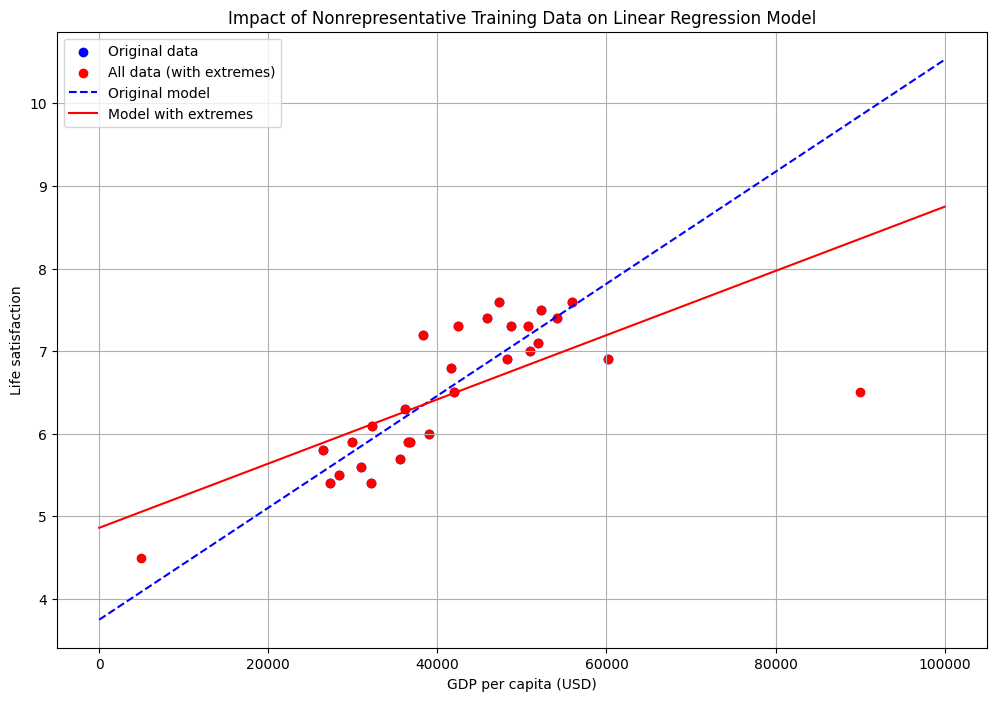

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


original_data = {
    'Country': ["Russia", "Greece", "Turkey", "Latvia", "Hungary", "Portugal", "Poland", "Estonia", "Spain",
                "Slovenia", "Lithuania", "Israel", "Italy", "United Kingdom", "France", "New Zealand",
                "Canada", "Finland", "Belgium", "Australia", "Sweden", "Germany", "Austria", "Iceland",
                "Netherlands", "Denmark", "United States"],
    'GDP per capita (USD)': [26456, 27287, 28385, 29932, 31008, 32181, 32238, 35638, 36215,
                             36548, 36732, 38341, 38992, 41627, 42026, 42404, 45856, 47260,
                             48210, 48698, 50683, 50922, 51936, 52280, 54209, 55938, 60236],
    'Life satisfaction': [5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6.0,
                          6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7.0, 7.1, 7.5, 7.4, 7.6, 6.9]
}


additional_data = {
    'Country': ["Poorland", "Wealthland"],
    'GDP per capita (USD)': [5000, 90000],
    'Life satisfaction': [4.5, 6.5]
}


all_data = {key: original_data[key] + additional_data[key] for key in original_data}


df_original = pd.DataFrame(original_data)
df_all = pd.DataFrame(all_data)


X_original = df_original[["GDP per capita (USD)"]]
y_original = df_original[["Life satisfaction"]]

X_all = df_all[["GDP per capita (USD)"]]
y_all = df_all[["Life satisfaction"]]


model_original = LinearRegression()
model_original.fit(X_original, y_original)

model_all = LinearRegression()
model_all.fit(X_all, y_all)


X_range = np.linspace(0, 100000, 1000).reshape(-1, 1)
y_pred_original = model_original.predict(X_range)
y_pred_all = model_all.predict(X_range)


plt.figure(figsize=(12, 8))
plt.scatter(X_original, y_original, color='blue', label='Original data')
plt.scatter(df_all["GDP per capita (USD)"], df_all["Life satisfaction"], color='red', label='All data (with extremes)')
plt.plot(X_range, y_pred_original, color='blue', linestyle='--', label='Original model')
plt.plot(X_range, y_pred_all, color='red', linestyle='-', label='Model with extremes')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Impact of Nonrepresentative Training Data on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


The plot shows the impact of nonrepresentative training data on a linear regression model.
The original data (blue points) cover GDP per capita between 23,500 and 62,500, resulting in a linear model (blue dashed line) that shows a steady increase in life satisfaction with GDP.


** Adding extreme GDP values (red points) significantly alters the model (red solid line), revealing that very high GDP per capita does not correspond to proportionally higher life satisfaction and may even decrease. This shows the importance of using a representative dataset for accurate modeling and good generalization.**

Ridge regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



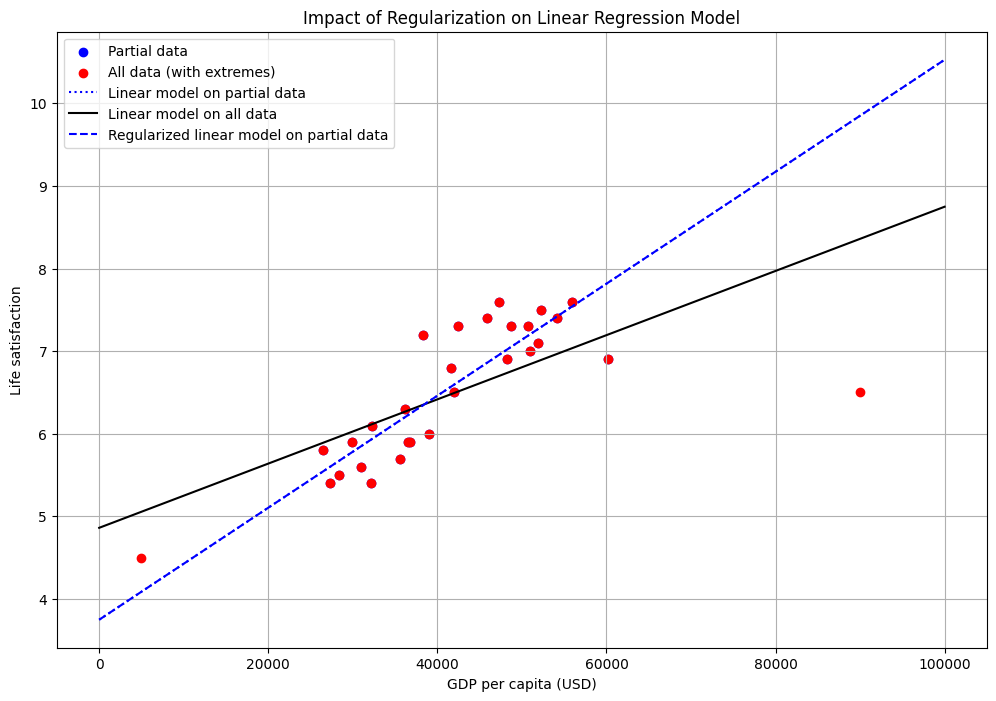

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge


data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

# Original dataset (partial data, without extreme()
partial_data = {
    'Country': ["Russia", "Greece", "Turkey", "Latvia", "Hungary", "Portugal", "Poland", "Estonia", "Spain",
                "Slovenia", "Lithuania", "Israel", "Italy", "United Kingdom", "France", "New Zealand",
                "Canada", "Finland", "Belgium", "Australia", "Sweden", "Germany", "Austria", "Iceland",
                "Netherlands", "Denmark", "United States"],
    'GDP per capita (USD)': [26456, 27287, 28384, 29932, 31007, 32181, 32238, 35638, 36215,
                             36547, 36732, 38341, 38992, 41627, 42025, 42404, 45856, 47260,
                             48210, 48697, 50683, 50922, 51935, 52279, 54209, 55938, 60235],
    'Life satisfaction': [5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6.0,
                          6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7.0, 7.1, 7.5, 7.4, 7.6, 6.9]
}

# Additional data (extreme GDP per capita values)
additional_data = {
    'Country': ["Poorland", "Wealthland"],
    'GDP per capita (USD)': [5000, 90000],
    'Life satisfaction': [4.5, 6.5]
}

# Combine partial data with additional data
all_data = {key: partial_data[key] + additional_data[key] for key in partial_data}

# Convert to DataFrames
df_partial = pd.DataFrame(partial_data)
df_all = pd.DataFrame(all_data)

#  for Prepare the data for linear regression
X_partial = df_partial[["GDP per capita (USD)"]]
y_partial = df_partial[["Life satisfaction"]]

X_all = df_all[["GDP per capita (USD)"]]
y_all = df_all[["Life satisfaction"]]

# Train linear regression models
model_partial = LinearRegression()
model_partial.fit(X_partial, y_partial)

model_all = LinearRegression()
model_all.fit(X_all, y_all)

# Train a regularized linear regression model (Ridge regression)
ridge_model = Ridge(alpha=1.0)  #The regularization is light. The model will be similar to standard linear regression, with a slight reduction in the magnitude of the coefficients.
ridge_model.fit(X_partial, y_partial)

# Make predictions
X_range = np.linspace(0, 100000, 1000).reshape(-1, 1)
y_pred_partial = model_partial.predict(X_range)
y_pred_all = model_all.predict(X_range)
y_pred_ridge = ridge_model.predict(X_range)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X_partial, y_partial, color='blue', label='Partial data')
plt.scatter(df_all["GDP per capita (USD)"], df_all["Life satisfaction"], color='red', label='All data (with extremes)')
plt.plot(X_range, y_pred_partial, color='blue', linestyle=':', label='Linear model on partial data')
plt.plot(X_range, y_pred_all, color='black', linestyle='-', label='Linear model on all data')
plt.plot(X_range, y_pred_ridge, color='blue', linestyle='--', label='Regularized linear model on partial data')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Impact of Regularization on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


The plot shows:

Partial Data (Blue Points):

Blue Dotted Line: Linear model on partial data. High slope indicates a strong relationship between GDP per capita and life satisfaction.
All Data (Red Points):

Black Line: Linear model on all data (including extremes). Different slope due to the influence of extreme values.
Regularized Model (Blue Dashed Line):

Ridge regression on partial data. Smaller slope, indicating less sensitivity to training data, leading to better generalization.
Key Point: Regularization helps create a model that generalizes better to new data by reducing sensitivity to the training data.(0.1 is used)

In [ ]:
pip install plotly geopandas


Interactive map:

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(go.Choropleth(
    locations = lifesat['Country'],
    z = lifesat['GDP per capita (USD)'],
    locationmode = 'country names',
    colorscale = 'rainbow',
    colorbar_title = 'GDP per capita (USD)'
))


fig.update_layout(
    title_text = 'GDP per capita by Country',
    geo=dict(
        showcoastlines=True,
    )
)


fig.show()


the above interactive map shows the gdp in each country

Figure 1-23. Overfitting the training data




visualisation to show the overfitting

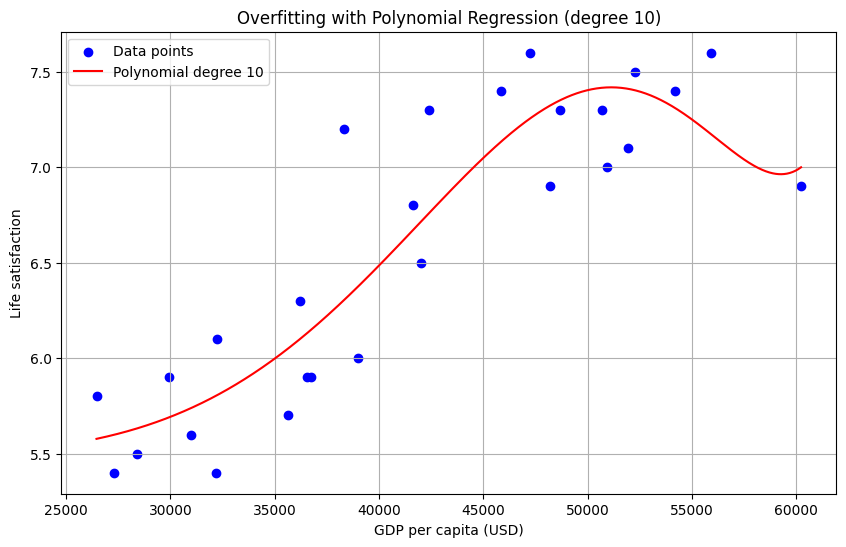

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Extract features (X) and target variable (y)
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)

# Create a high-degree polynomial regression model to show overfitting
degree = 10  # High-degree polynomial to demonstrate overfitting
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X, y)

# Generate predictions for the training data
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
predictions = model.predict(X_range)

# Visualize the data points and the overfitting polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, predictions, color='red', label=f'Polynomial degree {degree}')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title(f"Overfitting with Polynomial Regression (degree {degree})")
plt.legend()
plt.grid(True)
plt.show()


The plot shows how the high-degree polynomial model fits the training data very closely, capturing noise and fluctuations. This results in overfitting, where the model performs well on the training data but may not generalize well to new, unseen data.

conclusion based on the above analysis

The analysis confirms that there is a positive correlation between GDP per capita and life satisfaction.
 Countries with higher GDP per capita generally tend to have higher life satisfaction scores.
 However, this relationship is not perfectly linear, and higher GDP per capita does not solely determine life satisfaction. While GDP per capita is an important factor, it is not the only determinant of life satisfaction. Other factors such as healthcare, education, social support, and personal freedoms also play significant roles in determining overall life satisfaction. **Therefore, a balanced model considering these factors would better capture the true relationship between GDP per capita and life satisfaction**

---





part2:
using additional data provided in the github repo

the Better Life Index (BLI) data from OECD's website (to get the Life Satisfaction for each country), and World Bank GDP per capita data from OurWorldInData.org. The BLI data is in datasets/lifesat/oecd_bli.csv (data from 2020), and the GDP per capita data is in datasets/lifesat/gdp_per_capita.csv (data up to 2020).

loading the dataset

In [ ]:
import os
import urllib.request
import pandas as pd
from pathlib import Path

# Define the data path
datapath = Path("/content/datasets/lifesat")
datapath.mkdir(parents=True, exist_ok=True)

# Define the data root URL
data_root = "https://github.com/ageron/data/raw/main/"

# Download the files
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

# Load the datasets
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

# Display the first few rows of the datasets
print("OECD BLI Dataset:")
print(oecd_bli.head())
print("\nGDP per Capita Dataset:")
print(gdp_per_capita.head())


OECD BLI Dataset:
  LOCATION         Country INDICATOR                 Indicator MEASURE  \
0      AUS       Australia   JE_LMIS  Labour market insecurity       L   
1      AUT         Austria   JE_LMIS  Labour market insecurity       L   
2      BEL         Belgium   JE_LMIS  Labour market insecurity       L   
3      CAN          Canada   JE_LMIS  Labour market insecurity       L   
4      CZE  Czech Republic   JE_LMIS  Labour market insecurity       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   
3   Value        TOT      Total        PC  Percentage               0   
4   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units      

In [ ]:
print("OECD BLI Dataset Column Names:")
print(oecd_bli.columns)
print("\nGDP per Capita Dataset Column Names:")
print(gdp_per_capita.columns)

OECD BLI Dataset Column Names:
Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

GDP per Capita Dataset Column Names:
Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')


In [ ]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


the below code Merges two datasets (oecd_bli and gdp_per_capita) based on their indices.
Sorts the merged DataFrame by the GDP per capita column.
Selects only the GDP per capita and life satisfaction columns for the final DataFrame.
Displays the first five rows of the resulting DataFrame.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np


merged_data = merged_data.dropna()


numeric_data = merged_data.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Variables')
plt.show()

# Prepare the data for regression analysis
X = numeric_data.drop(columns=['Life satisfaction'])
y = numeric_data['Life satisfaction']

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Define the cross-validation method (5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print(f'{name} Cross-Validation R^2 Scores: {cv_scores}')
    print(f'{name} Mean R^2 Score: {np.mean(cv_scores)}')
    print(f'{name} Standard Deviation of R^2 Scores: {np.std(cv_scores)}')
    print('-'*50)


In [ ]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [ ]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [ ]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

The code plots GDP per capita against life satisfaction, annotates specific countries with arrows and labels, sets the axis limits, saves the plot as an image, and displays it.

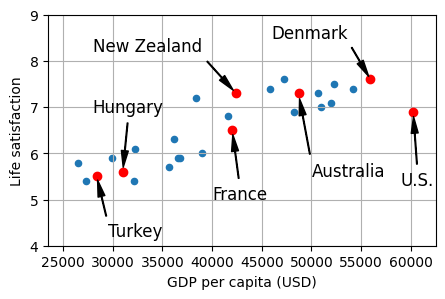

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
# Save the figure using plt.savefig
plt.savefig('money_happy_scatterplot.png')

# Show the plot
plt.show()

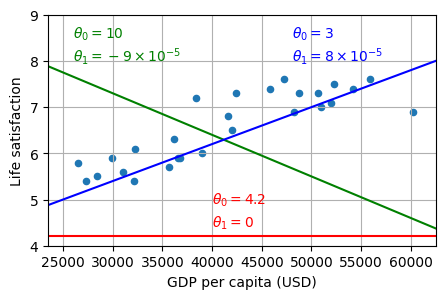

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('money_happy_scatterplot.png')

# Show the plot
plt.show()

Scatter Plot: Visualizes the relationship between GDP per capita and life satisfaction.
Linear Models: Three different linear models are plotted with different parameters:
Red Line: Intercept = 4.2, Slope = 0 (flat line).
Green Line: Intercept = 10, Slope = -9 × 10^-5 (downward slope).
Blue Line: Intercept = 3, Slope = 8 × 10^-5 (upward slope).
Annotations: Each line is annotated with its parameters.
Axes Limits: Set based on min_gdp, max_gdp, min_life_sat, and max_life_sat.
Save and Show: Saves the plot as tweaking_model_params_plot.png and displays it.

General Trend: The scatter plot shows a general positive correlation between GDP per capita and life satisfaction. As GDP per capita increases, life satisfaction generally increases.
Model Comparisons:
Red Line: Represents a model with no relationship between GDP per capita and life satisfaction, which doesn't fit the data well.
Green Line: Represents a model suggesting a negative relationship, which contradicts the observed trend.
Blue Line: Represents a model suggesting a positive relationship, which aligns with the observed trend.

In [ ]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


The intercept
𝜃
0
=
3.75
θ
0
​
 =3.75 provides the baseline life satisfaction score.
The slope
𝜃
1
=
6.78
×
1
0
−
5
θ
1
​
 =6.78×10
−5
  indicates that life satisfaction increases slightly with each dollar increase in GDP per capita.
Together, they define a linear relationship between GDP per capita and life satisfaction, suggesting a positive but gradual increase in life satisfaction as GDP per capita increases.

**Instead of cyprus , i have taken algeria**

In [ ]:
Algeria_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Algeria"]
Algeria_gdp_per_capita

10681.6792969827

In [ ]:
Algeria_predicted_life_satisfaction = lin1.predict([[Algeria_gdp_per_capita]])[0, 0]
Algeria_predicted_life_satisfaction

4.4731497525905795

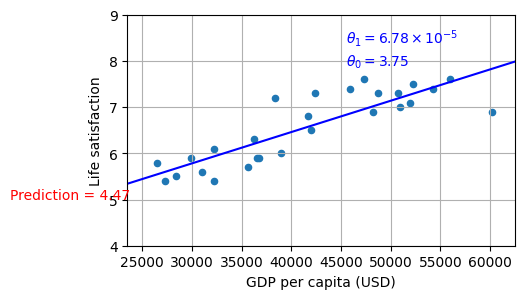

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([Algeria_gdp_per_capita, Algeria_gdp_per_capita],
         [min_life_sat, Algeria_predicted_life_satisfaction], "r--")
plt.text(Algeria_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {Algeria_predicted_life_satisfaction:.2f}", color="r")
plt.plot(Algeria_gdp_per_capita, Algeria_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

for algeria,the prediction is 4.47

In [ ]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

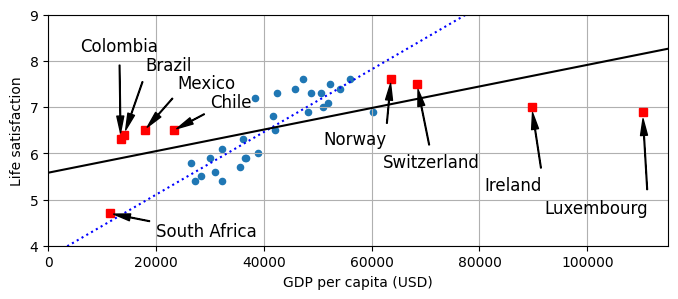

In [ ]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('representative_training_data_scatterplot.png')

# Show the plot
plt.show()

plot showing the relationship between GDP per capita and life satisfaction, including missing data annotations in red dots

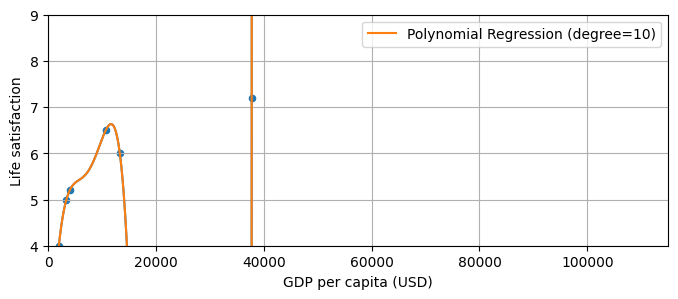

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
# Plot the polynomial regression curve
plt.plot(X, curve, label="Polynomial Regression (degree=10)")

# Set plot limits
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Add legend
plt.legend()

# Save the figure using plt.savefig
plt.savefig('overfitting_model_plot.png')

# Show the plot
plt.show()



The scatter plot shows the relationship between GDP per capita and life satisfaction for a few countries.
The polynomial regression curve of degree 10 is overly complex and demonstrates overfitting.

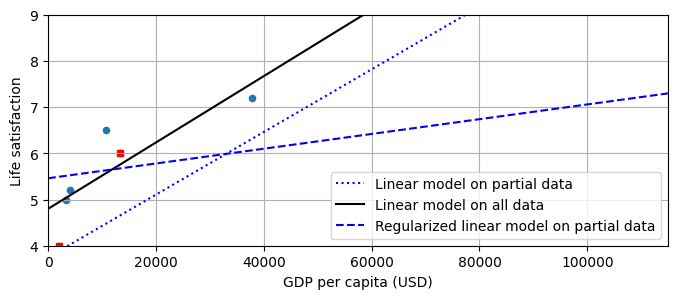

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# Merge the datasets
country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

# Define axis limits
min_life_sat = 4
max_life_sat = 9

# Fit linear models
Xfull = np.c_[country_stats[gdppc_col]]
yfull = np.c_[country_stats[lifesat_col]]
lin_reg_full = linear_model.LinearRegression()
lin_reg_full.fit(Xfull, yfull)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

# Define the X range for plotting
X = np.linspace(0, 115_000, 1000)

# Linear model parameters (pre-defined)
t0 = 3.75
t1 = 6.78e-05

# Prepare missing data DataFrame
missing_data = pd.DataFrame({
    "GDP per capita (USD)": [1978.961579, 13295.410885],
    "Life satisfaction": [4.0, 6.0]
}, index=["Afghanistan", "Albania"])

# Plotting
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col, marker="s", color="r", grid=True, ax=plt.gca())

plt.plot(X, t0 + t1 * X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

# Ridge regression
ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--", label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('ridge_model_plot.png')

# Show the plot
plt.show()


The solid black line is considered the most reliable as it uses all the data.
The blue dotted line overestimates the relationship due to using only partial data.
The blue dashed line (regularized model) provides a more balanced fit compared to the unregularized model on partial data, indicating that regularization helps in mitigating overfitting.
Overall, the plot demonstrates how different regression models (with and without regularization) and data subsets affect the interpretation of the relationship between GDP per capita and life satisfaction.

Additional analysis

Descriptive Statistics:
        GDP per capita (USD)  Life satisfaction
count           4572.000000        4572.000000
mean           36308.732940           6.585717
std            16913.846275           0.824493
min             8307.253260           4.400000
25%            24754.225913           5.900000
50%            36215.447591           6.600000
75%            45888.476327           7.300000
max           114889.179994           8.200000

Correlation between GDP per capita and Life satisfaction:
                       GDP per capita (USD)  Life satisfaction
GDP per capita (USD)              1.000000           0.578892
Life satisfaction                 0.578892           1.000000


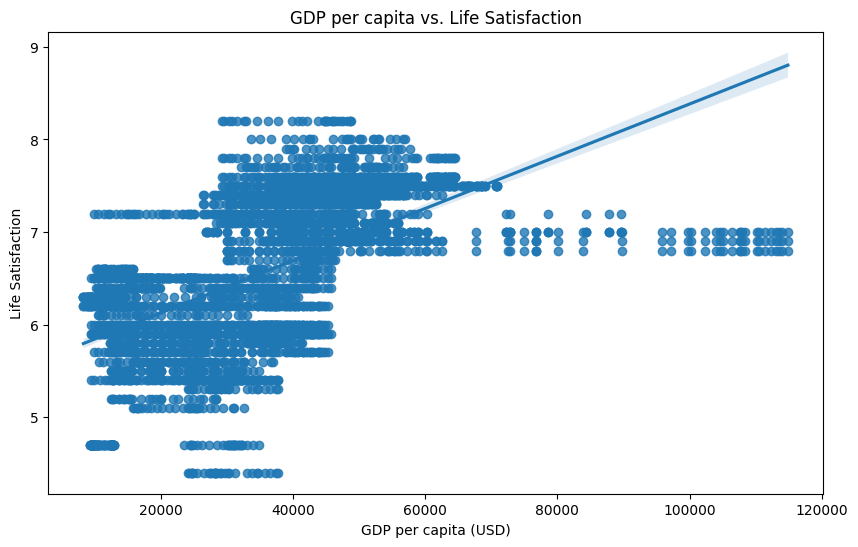


Regression Analysis Summary:
                             OLS Regression Results                            
Dep. Variable:      Life satisfaction   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2303.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Likelihood:                -4671.5
No. Observations:                4572   AIC:                             9347.
Df Residuals:                    4570   BIC:                             9360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
c

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


desc_stats = merged_data[['GDP per capita (USD)', 'Life satisfaction']].describe()
print("Descriptive Statistics:\n", desc_stats)


correlation = merged_data[['GDP per capita (USD)', 'Life satisfaction']].corr()
print("\nCorrelation between GDP per capita and Life satisfaction:\n", correlation)

plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita (USD)', y='Life satisfaction', data=merged_data)
plt.title('GDP per capita vs. Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.show()

X = merged_data['GDP per capita (USD)']
y = merged_data['Life satisfaction']
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:\n", model.summary())


if model.pvalues[1] < 0.05:
    print("\nConclusion: There is a statistically significant relationship between GDP per capita and Life satisfaction.")
else:
    print("\nConclusion: There is no statistically significant relationship between GDP per capita and Life satisfaction.")



Conclusion: There is a statistically significant relationship between GDP per capita and Life satisfaction.